In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [4]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
df = pd.read_csv("SeoulBikeData.csv").drop(["Date", "Holiday", "Seasons"], axis=1)

dropping th column date holiday and seasond from axis =1

In [5]:
df.columns = dataset_cols
df["functional"] = (df["functional"] == "Yes").astype(int)
df = df[df["hour"] == 12]
df = df.drop(["hour"], axis=1)

we make hour ==12 and drop the column hour because we have different values of hour ..and typecast functional to int

In [6]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


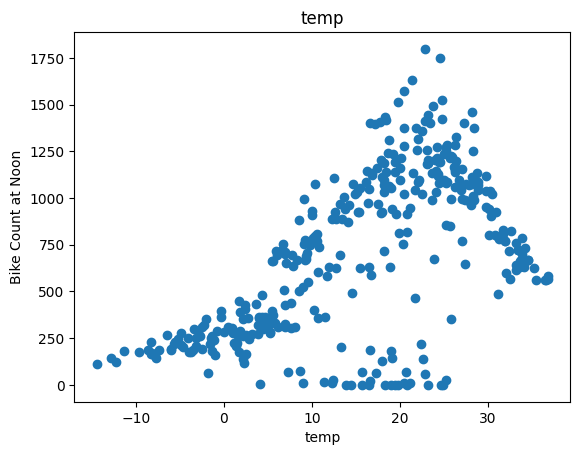

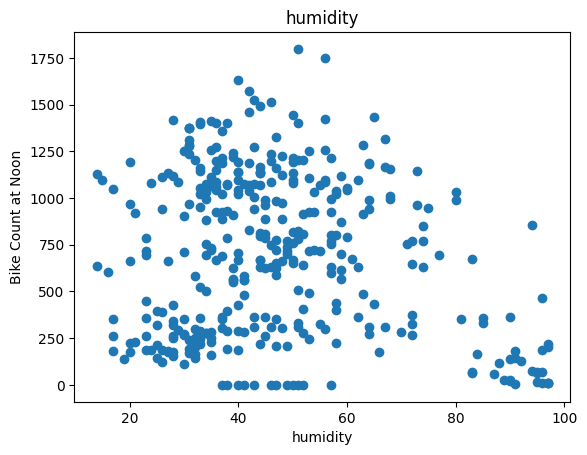

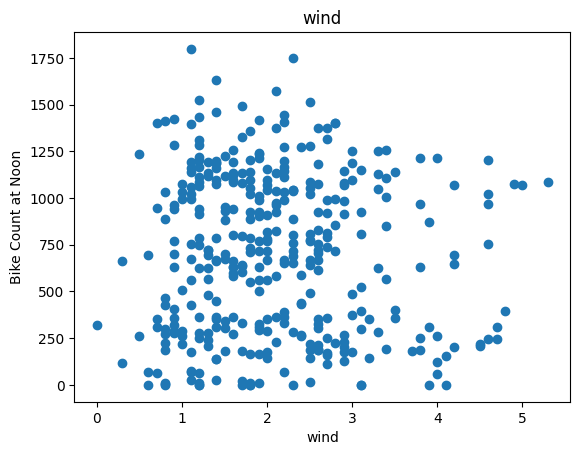

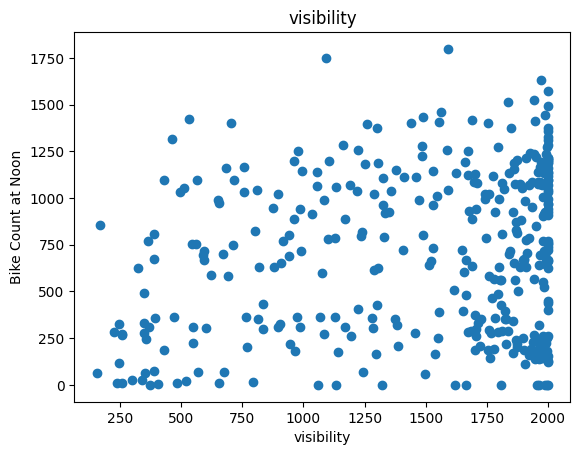

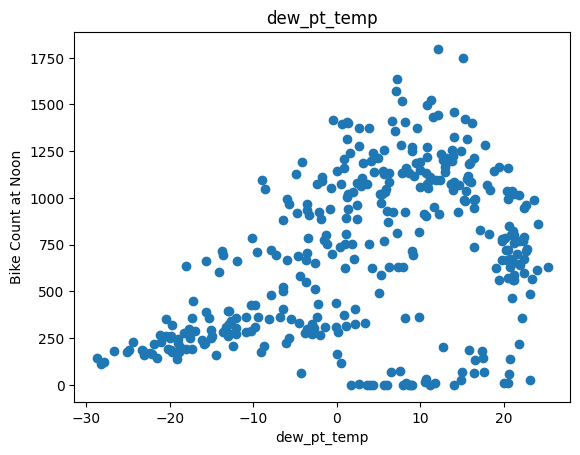

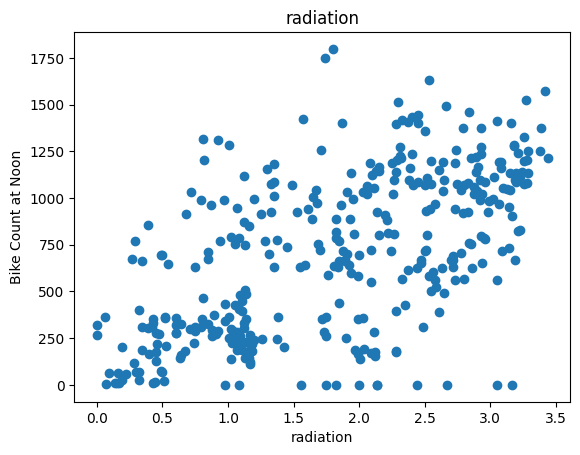

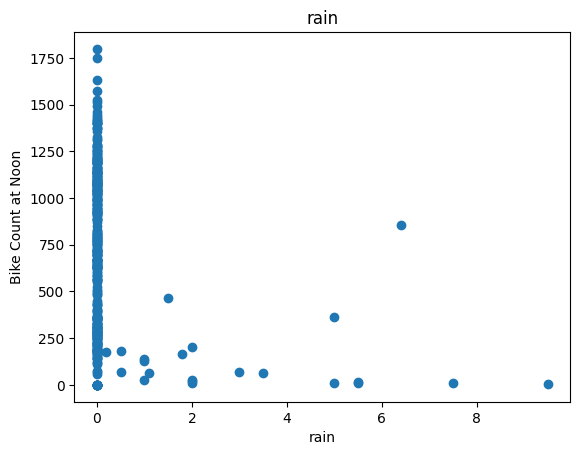

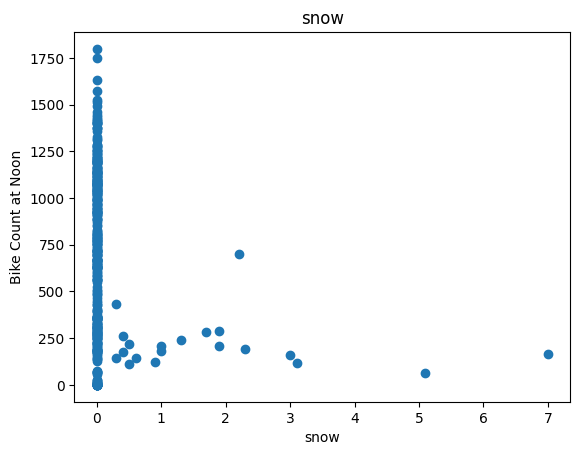

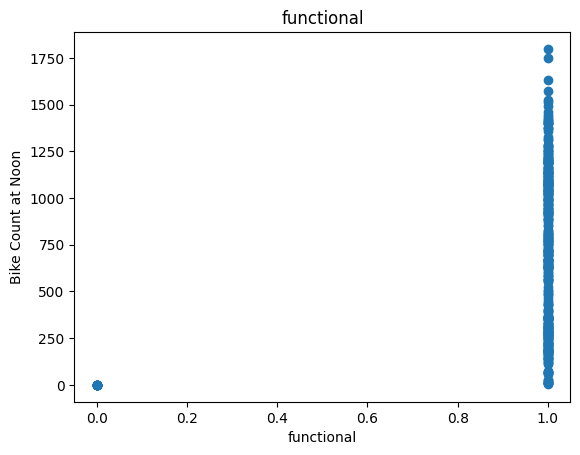

In [7]:
for label in df.columns[1:]:
  plt.scatter(df[label], df["bike_count"])
  plt.title(label)
  plt.ylabel("Bike Count at Noon")
  plt.xlabel(label)
  plt.show()

In [8]:
df = df.drop(["wind", "visibility", "functional"], axis=1)

we drop the above columns because we dont found any relations between them in the scatter plt as nothing have useful

In [9]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


#Train valid Test


In [10]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [11]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))

  return data, X, y

we made a deep copy of our datafeame,c means columns..
if there exists x label then  there is code ..

In [12]:
_, X_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels=["temp"])
_, X_val_temp, y_val_temp = get_xy(val, "bike_count", x_labels=["temp"])
_, X_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels=["temp"])

now we are getting x and y  dataset for temp to do test , valid, train  so we define a function to do that

In [13]:
X_train_temp

array([[ 34.5],
       [  1.5],
       [  2.3],
       [  4.1],
       [ 20.5],
       [ 23.2],
       [ 27.1],
       [ -2.3],
       [ 22.2],
       [ 26.3],
       [  7. ],
       [ 12.3],
       [ 25.2],
       [ 10. ],
       [  6. ],
       [ 22.9],
       [ 23.7],
       [ -6. ],
       [ 20.5],
       [ 21.8],
       [ 16.3],
       [ 23.7],
       [ 24.3],
       [ 21.5],
       [ -2. ],
       [ 27.9],
       [ 36.8],
       [ 27. ],
       [ 27.4],
       [ 15.2],
       [ 30.1],
       [  6.9],
       [ 28.4],
       [ 25.7],
       [ 36.8],
       [  3.9],
       [ 22.9],
       [ 10.2],
       [ 33.8],
       [ 25.2],
       [ 17.4],
       [  6.9],
       [  3.9],
       [-12.8],
       [  9.8],
       [ 31.7],
       [ 17.2],
       [ 18.3],
       [  4. ],
       [ -1.1],
       [ -1.3],
       [ 15.5],
       [  6.6],
       [ 20.1],
       [ 30.2],
       [ 18.4],
       [ 28.3],
       [ 19.6],
       [ -0.3],
       [ -2.5],
       [ 33.2],
       [ 13.9],
       [

In [14]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

creating reegression

In [15]:
temp_reg.score(X_test_temp, y_test_temp)

0.29306522954624714

this is getting r square

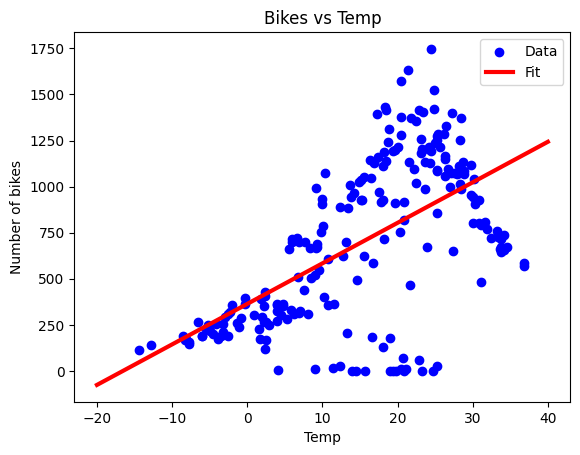

In [16]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

bikes vs temperature

#Multiple Regression

In [17]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, X_train_all, y_train_all = get_xy(train, "bike_count", x_labels=df.columns[1:])
_, X_val_all, y_val_all = get_xy(val, "bike_count", x_labels=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, "bike_count", x_labels=df.columns[1:])

In [18]:
all_reg=LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [19]:
all_reg.score(X_test_all,y_test_all)

0.48393969629483824

we have improved r square  from 0.37 to 0.50

In [20]:
y_pred_lr = all_reg.predict(X_test_all)

#regression with neural network

In [21]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

just the function to show plot

In [22]:
temp_normalizer =tf.keras.layers.Normalization(input_shape=[1],axis =None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

created noramlization layer for tf

In [23]:
temp_nn_model = tf.keras.Sequential([
  temp_normalizer,
  tf.keras.layers.Dense(1)
])

passed normalized layer and asking for 1 single  layer

In [24]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

comiling and using atom as an optimizer with learning rate and loss function

In [25]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    verbose=0,
    epochs=1000,
    validation_data=(X_val_temp, y_val_temp)
)

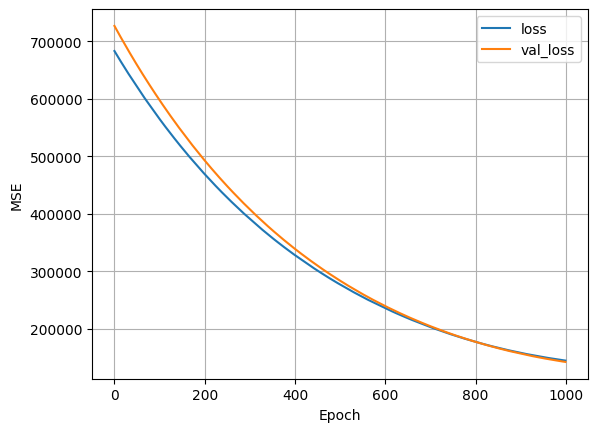

In [26]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


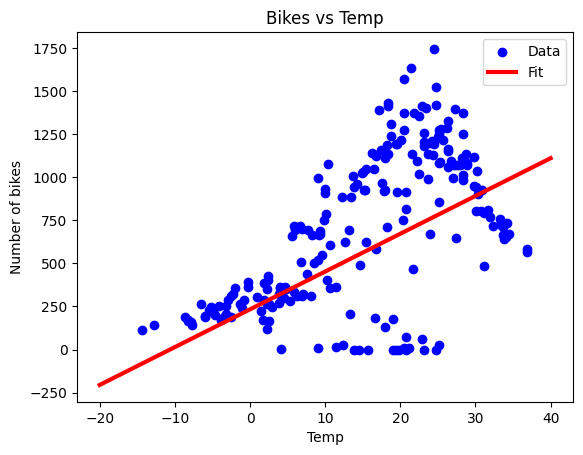

In [27]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

in this we are using backpropagation and plotting the same graph

#NEural Net


In [41]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

creating a neural net
..compiling
...learning rate


In [42]:
history = nn_model.fit(
    X_train_temp, y_train_temp,
    validation_data=(X_val_temp, y_val_temp),
    verbose=0, epochs=100
)

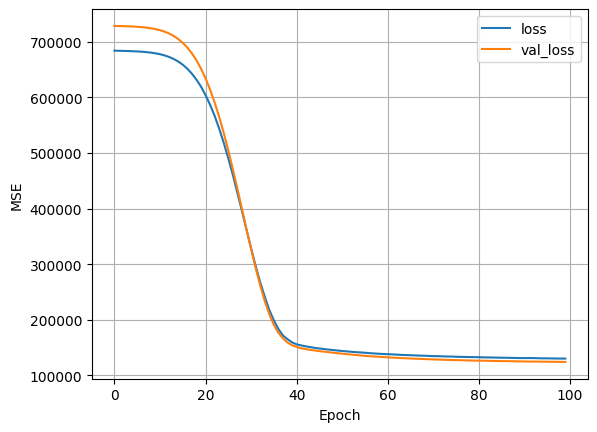

In [43]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


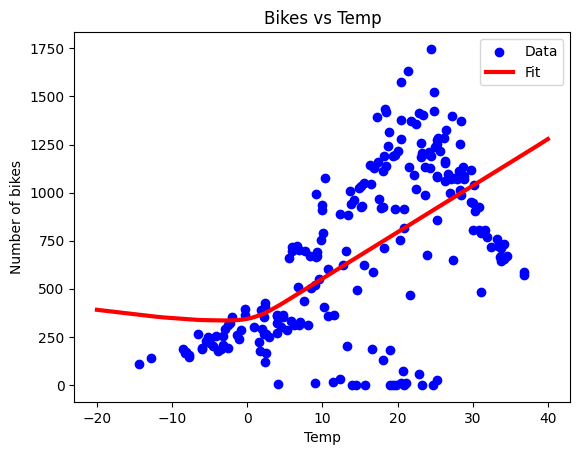

In [44]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

# for multiple input for all

In [32]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
all_normalizer.adapt(X_train_all)

In [33]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [34]:
history = nn_model.fit(
    X_train_all, y_train_all,
    validation_data=(X_val_all, y_val_all),
    verbose=0, epochs=100
)

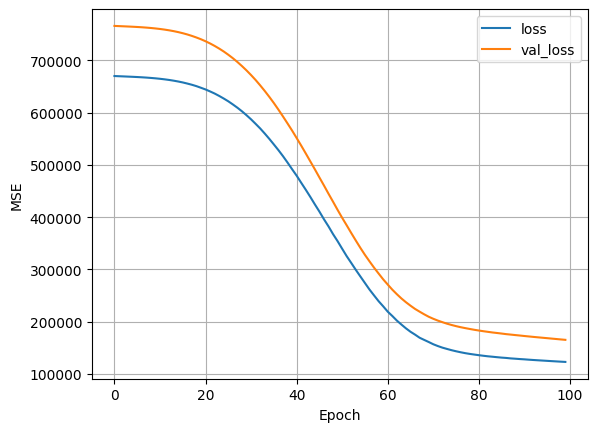

In [35]:
plot_loss(history)

now # calculate the MSE for both linear reg and nn

In [36]:
y_pred_lr = all_reg.predict(X_test_all)
y_pred_nn = nn_model.predict(X_test_all)

3/3 [==============================] - 0s 4ms/step


In [37]:
def MSE(y_pred, y_real):
  return (np.square(y_pred - y_real)).mean()

calculating mse of predicted and real and then subtraction and taking its mean

In [38]:
MSE(y_pred_lr, y_test_all)

93334.46839349717

In [39]:
MSE(y_pred_nn, y_test_all)

131886.30720416733

now plotting the actual values on x axis and th prediction in x axis

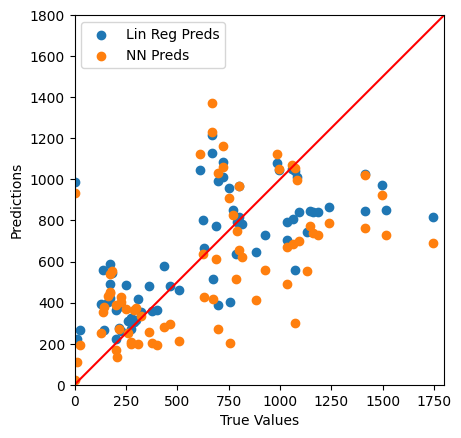

In [40]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test_all, y_pred_lr, label="Lin Reg Preds")
plt.scatter(y_test_all, y_pred_nn, label="NN Preds")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c="red")